# Jupyter notebook for Privacy in Data Storage

In this notebook we explore privacy and ethics in Data Storage. We will look at concepts like k-anonymity, l-diversity, t-closeness etc. This notebook includes exercises in python and discussions. 

It should be done in **groups**, especially the discussions, to get the full learning effect.


### The goal of this notebook

1. Be able to anonymize data and analyse anonymous data for re-identification

2. Learn the concepts of k-anonymity, l-diversity, t-closeness and function creep as examples of privacy related topics

3. Identify assumptions and biases in some datasets. For example in categorising data, in particular for a categorisation that is up for discussion (e.g. gender = [male, female])

4. The students should be able to analyse the potential dangers (The impact on (vulnerable) users, society and source of the data) of working with unrestricted and controversial data like health diseases, crime or similar topics

### Prior knowledge needed

- The user should be familiar with python and jupyter notebooks

- The user should be familiar with the pandas library in python

## Warmup

Before we go through examples and exercies you should take a moment to reflect over the following questions.

**1. What is the meaning of "sensible-data" according to you? Could you name some?**

**2. What is the purpose of anonymization? Is it even important?**

**3. What are the main issues linked to re-identification of a person?**

# Anonymization of data

In the following part we will go through an example of where anonymization could be useful and k-anonymity could help achieve anonymization.

Health information is widely acknowledged to be sensitive personal information. Information of this type may contain facts about an individual that can be used by insurance companies, future employers or others against the benefit of the person involved. For this reason, in many countries and jurisdictions, gathering, storing and publishing such data by third parties is limited by laws and regulations. In general, the gist of this type of legislation is twofold. For a third party to be allowed to process health data, either:

* the person the information is about has given permission for usage
* the data is changed in such a way that it is not possible to determine the identity of the individual


Although health data is sensitive in the sense described above, large health datasets can offer a wealth of information to scientists and researchers, for example in determining the effects of specific medication or finding correlations between lifestyle and disease. However, datasets with this type of information may not be used without satisfying either of the conditions mentioned.

Especially for large existing datasets, it can be very difficult, if not completely infeasible, to obtain permission from each individual in the dataset. In order to use this data without jeopardizing an individuals privacy and stay within legal boundaries, the data needs to be changed in such a way that it is impossible to determine the identity of individual the information is about. This process is commonly referred to as **anonymization**.

A common solution for anonymization is simply removing all values from the dataset that identify a person directly, e.g. remove a person's name and SSI. Sometimes a variant known as pseudonimization is used, where this information is not removed, but replaced by a specific ID number. This ID number can only be traced back to the person involved through a Trusted Third Party (TTP)

Depending on context, these methods have advantages and disadvantages. One important observation however, is that very often the second condition is not adequately satisfied: it is still possible to infer the identity of the person involved from the given data.

Consider the following (hypothetical) example of an anonymized dataset published by Dr. Bob for medical research.

![jupyter](example.png)

#### Discussion 1

At first glance, no identifiable information has been leaked in this dataset. But take a moment and discuss with your group. Could there be any potential dangers for anonymity?

Imagine you walk by Dr. Bob's office and see a person with the following characteristics:

* She is a woman
* She is quite young (at least younger than 20 by estimation)
* She has an occupation as chef or baker (or something that requires similar attire, as she wears a chef's hat)

While any of these characteristics by themselves would match multiple records in the dataset, there's only one record that satisfies all three. Therefore we can learn the medical condition of this person and Dr. Bob has revealed personal information about one of his patients.

Of course, in this example re-identifying a person is quite easy, because the dataset is relatively small. In a larger dataset, one could argue, more young, female chefs might be included, making it more difficult or even impossible to determine the exact record in the dataset depicting the person from the photo.

This argument makes sense; a real-world dataset would probably contain many more records than the example. However, such a real-world dataset usually also contains many more columns (i.e. more data per record). It's not difficult to see that more data increases the risk of re-identification again. Furthermore, many people may be indistinguishable (or equivalent) within the dataset, but some records will still have a unique combination of values. As an example, someone with a very uncommon profession and being above 100 years old is still easily re-identified in most large datasets.

#### Discussion 2

How can we mitigate this type of risk?

We could leave out many of the columns, but this would destroy most of the analytical value in the data, which defeats the purpose of releasing the data in the first place. A better solution would leave out as much data as needed to prevent re-identification, but not more. Such a solution would allow us to retain analytical value as much as possible, while respecting privacy for subjects involved. The trade-off we seek to optimize can be depicted a follows:

![jupyter](example2.png)

The solution for the problem described above: make sure that every record has at least one equivalent record, i.e. a record that contains the same values on all properties that are publicly known or easy to determine.

## k-anonymity

The concept of k-anonymity is used to express the level of privacy in a dataset. In a dataset that was de-identified following a k-anonymity algorithm, all records are equivalent to one or more other records, creating a group of equivalent records, or equivalence class. The size of the smallest of these groups in a dataset is the value of k.

#### Discussion 3

What would be needed to make the above dataset k-2-anonymous?

See for example an adapted version of the table above:

![jupyter](example3.png)

When we ignore the (presumably not publicly known) _Medical condition_ column, every record in the table above has at least one duplicate. The smallest set of equivalent records (i.e. the smallest equivalence class) in this table has size two (e.g. the set Male/50+/Yes). Thus this table can be considered 2-anonymous. Note that real-world values for _k_ are usually a lot larger.

## How to achieve k-anonymity

Looking at the table above, we can observe the changes that made this dataset reach the 2-anonymity level:

* One record was completely suppressed
* The age value for each record was classified into one of two categories: 50- or 50+
* The occupation value for each record was generalized into Yes or No

These observations show two common techniques regularly used in combination to achieve a certain level of anonymity:

* Suppression: leaving out records that have a very unique combination of attribute values
* Generalization: making values more generic, so that more records share the same value

In applying these techniques, decisions have to be made about which records to suppress and to what extent the columns should be generalized. These decisions can depend on the purpose the dataset is released for: age may be a relevant variable in some scientific studies, but less so in others. Very often however, datasets are released for a general purpose or the purpose may be difficult to obtain. In these cases, algorithms may be used that try to reach k-anonymity with the least amount of suppression and generalization possible. These algorithms typically involve trying a lot of combinations of generalization levels and suppression criteria, before an optimal solution is chosen.

## Implementing k-anonymity

In this notebook, we'll explore data anonymization, in particular "k-anonymity" [1]. We will implement a simple algorithm [2] to produce a k-anonymous dataset.

For more reading on the topic, please see: 

- [k-Anonymity: A Model For Protecting Privacy. Latanya Sweeney](https://epic.org/privacy/reidentification/Sweeney_Article.pdf)
- [Mondrian - Multidimensional k-Anonymity](https://www.utdallas.edu/~muratk/courses/privacy08f_files/MultiDim.pdf)

Turning a dataset into a k-anonymous (and possibly l-diverse or t-close) dataset is a complex problem, and finding the optimal partition into k-anonymous groups is an NP-hard problem. Fortunately, several practical algorithms exists that often produce "good enough" results by employing greedy search techniques.

In this tutorial we will explore the so-called "Mondrian" algorithm (see link above), which uses a greedy search algorithm to parition the original data into smaller and smaller groups (if we plot the resulting partition boundaries in 2D they resemble the pictures by Piet Mondrian, hence the name).

The algorithm assumes that we have converted all attributes into numerical or categorical values and that we're able to measure the "span" of a given data attribute $X_i$ (we'll explain that in more detail later).

### Partitioning Algorithm

The algorithm proceeds then as follows to partition the data into k-anonymous gorups:

1. Initialize the finished set of partitions to an empty set $P_{finished} = \{\}$.
2. Initialize the working set of paritions to a set containing a partition with the entire dataset $P_{working} = \{\{1, 2,\dots ,N\}\}$.
4. While there are partitions in the working set, pop one partition from it and
  * Calculate the relative spans of all columns in the partition.
  * Sort the resulting columns by their span (in descending order) and iterate over them. For each column,
      * Try to split the partition along that column using the median of the column values as the split point.
      * Check if the resulting partitions are valid according to our k-anonymity (and possibly additional) criteria.
      * If yes, add the two new partitions to the working set and break out of the loop.
  * If no column produced a valid split, add the original partition to the set of finished partitions.
5. Return the finished set of partitions

### Data Aggregation

After obtaining the partitions we still need to aggregate the values of the quasi identifiers and the sensitive attributes in each k-anonymous group. For this, we can e.g. replace numerical attributes with their range (e.g. "age: 24-28") and categorical attributes with their union (e.g. "employment-group: [self-employed, employee, worker]"), though other aggregations are possible. Methods like [Anatomy](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.156.9150&rep=rep1&type=pdf) even preserve the micro-data in each group, which increases re-identification risk though.

We can then use the anonymized data for privacy-preserving machine learning, e.g. using scikit-learn or something similar.

#### Discussion 4

What should you think about after you have implemented k-anonymity on a dataset?

## Programming k-anonymity

Let's get started with the programming!

In [1]:
# we use Pandas to work with the data as it makes working with tables of data super easy
import pandas as pd

We start by importing some data

In [2]:
# this is a list of the column names in our dataset (as the file doesn't contain any headers)
names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
)

# some fields are categorical and will require special treatment
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
    'income',
))

df = pd.read_csv("Data/adult.all.txt", sep=", ", header=None, names=names, index_col=False, engine='python');# We load the data using Pandas

In [3]:
# Take a look at the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k


#### Discussion 5

Are there any potensial biases you should think about when working with this dataset?

**Implement a function that returns the spans (max-min for numerical columns, number of different values for categorical columns) of all columns for a partition of a dataframe.** 

In [21]:
for name in categorical:
    df[name] = df[name].astype('category')

In [22]:
def get_spans(df, partition):
    """
    :param        df: the dataframe for which to calculate the spans
    :param partition: the partition for which to calculate the spans
    :        returns: The spans of all columns in the partition
    """
    spans = {}
    for column in df.columns:
        if column in categorical:
            span = len(df[column][partition].unique())
        else:
            span = df[column][partition].max()-df[column][partition].min()
        spans[column] = span
    return spans

In [23]:
full_spans = get_spans(df, df.index)
full_spans

{'age': 73,
 'workclass': 9,
 'fnlwgt': 1478115,
 'education': 16,
 'education-num': 15,
 'marital-status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'capital-gain': 99999,
 'capital-loss': 4356,
 'hours-per-week': 98,
 'native-country': 42,
 'income': 2}

The answer should be like this:

```
{'age': 73,
 'workclass': 9,
 'fnlwgt': 1478115,
 'education': 16,
 'education-num': 15,
 'marital-status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'capital-gain': 99999,
 'capital-loss': 4356,
 'hours-per-week': 98,
 'native-country': 42,
 'income': 2}
```

**Implement a `split` function that split the given partition such that all rows with values of the column `column` below the median are in one partition and all rows with values above or equal to the median are in the other.**

In [24]:
def split(df, partition, column):
    """
    :param        df: The dataframe to split
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    dfp = df[column][partition]
    if column in categorical:
        values = dfp.unique()
        lv = set(values[:len(values)//2])
        rv = set(values[len(values)//2:])
        return dfp.index[dfp.isin(lv)], dfp.index[dfp.isin(rv)]
    else:        
        median = dfp.median()
        dfl = dfp.index[dfp < median]
        dfr = dfp.index[dfp >= median]
        return (dfl, dfr)

In [49]:
# We test the split function on a subset of the dataset
partitions = split(df, df[:20].index, 'age')
partitions

(Int64Index([4, 5, 8, 10, 11, 12, 13, 15, 16, 17], dtype='int64'),
 Int64Index([0, 1, 2, 3, 6, 7, 9, 14, 18, 19], dtype='int64'))

The output should be like this:
```
(Int64Index([4, 5, 8, 10, 11, 12, 13, 15, 16, 17], dtype='int64'),
 Int64Index([0, 1, 2, 3, 6, 7, 9, 14, 18, 19], dtype='int64'))
```
It displays which of our rows belong to each partition. We can see that this particular partitioning was really even. 

**The next helper function we need is just for detecting if a partition is big enough to satisfy our `k`.**

In [ ]:
def is_k_anonymous(df, partition, sensitive_column, k=3):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    if len(partition) < k:
        return False
    return True

Now that we have all helper functions in place, we can implement the partition algorithm discussed above:

**Implement the partitioning algorithm descibed in the Partitioning Algorithm section, using a k-anonymous criterion for the partitions you create.**

In [25]:
def partition_dataset(df, feature_columns, sensitive_column, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
    finished_partitions = []
    partitions = [df.index]
    while partitions:
        partition = partitions.pop(0)
        spans = get_spans(df[feature_columns], partition)
        # Get the columns with spans in descending order
        for column, span in sorted(spans.items(), key=lambda x:-x[1]):
            # Split the partitioned columns and check if they are of valid length
            lp, rp = split(df, partition, column)
            if not is_valid(df, lp, sensitive_column) or not is_valid(df, rp, sensitive_column):
                continue
            #if they are of valid length, add them to partitions for next iteration to check if they can be further divided
            partitions.extend((lp, rp))
            break
        else:
            finished_partitions.append(partition)
    return finished_partitions

Now let's try this on our dataset! To keep things simple, we will at first select only two columns from the dataset that we apply the partitioning to. This makes it easier to check/visualize the result and speed up the execution (the naive algorithm can take several minutes when running on the entire dataset) 

In [32]:
# we apply our partitioning method to two columns of our dataset, using "income" as the sensitive attribute
feature_columns = ['age', 'education-num']
sensitive_column = 'income'
finished_partitions = partition_dataset(df, feature_columns, sensitive_column, is_k_anonymous)

In [33]:
# we get the number of partitions that were created
len(finished_partitions)

477

Let's visualize the created partitions! To do that, we will write functions to get the rectangular bounds of a partition along two columns. We can then plot these rects to see how our partitioning function divides the dataset. If we perform the partition only along the two columns selected for plotting then the resulting rects should not overlap and cover the entire dataset.

In [50]:
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [51]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
        values = sorted(df[column].unique())
        indexes[column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

def get_partition_rects(df, partitions, column_x, column_y, indexes, offsets=[0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [52]:
# we calculate the bounding rects of all partitions that we created
indexes = build_indexes(df)
column_x, column_y = feature_columns[:2]
rects = get_partition_rects(df, finished_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

In [53]:
# let's see how our rects look like
rects[:10]

[((21.0, 10.0), (22.0, 15.0)),
 ((22.0, 10.0), (23.0, 15.0)),
 ((23.0, 10.0), (24.0, 12.0)),
 ((32.0, 10.0), (34.0, 12.0)),
 ((37.0, 9.0), (38.0, 10.0)),
 ((41.0, 9.0), (43.0, 10.0)),
 ((37.0, 10.0), (38.0, 12.0)),
 ((41.0, 10.0), (43.0, 13.0)),
 ((17.0, 6.0), (21.0, 7.0)),
 ((17.0, 7.0), (18.0, 8.0))]

In [54]:
# we plot the rects
def plot_rects(df, ax, rects, column_x, column_y, edgecolor='black', facecolor='none'):
    for (xl, yl),(xr, yr) in rects:
        ax.add_patch(patches.Rectangle((xl,yl),xr-xl,yr-yl,linewidth=1,edgecolor=edgecolor,facecolor=facecolor, alpha=0.5))
    ax.set_xlim(*get_bounds(df, column_x, indexes))
    ax.set_ylim(*get_bounds(df, column_y, indexes))
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)

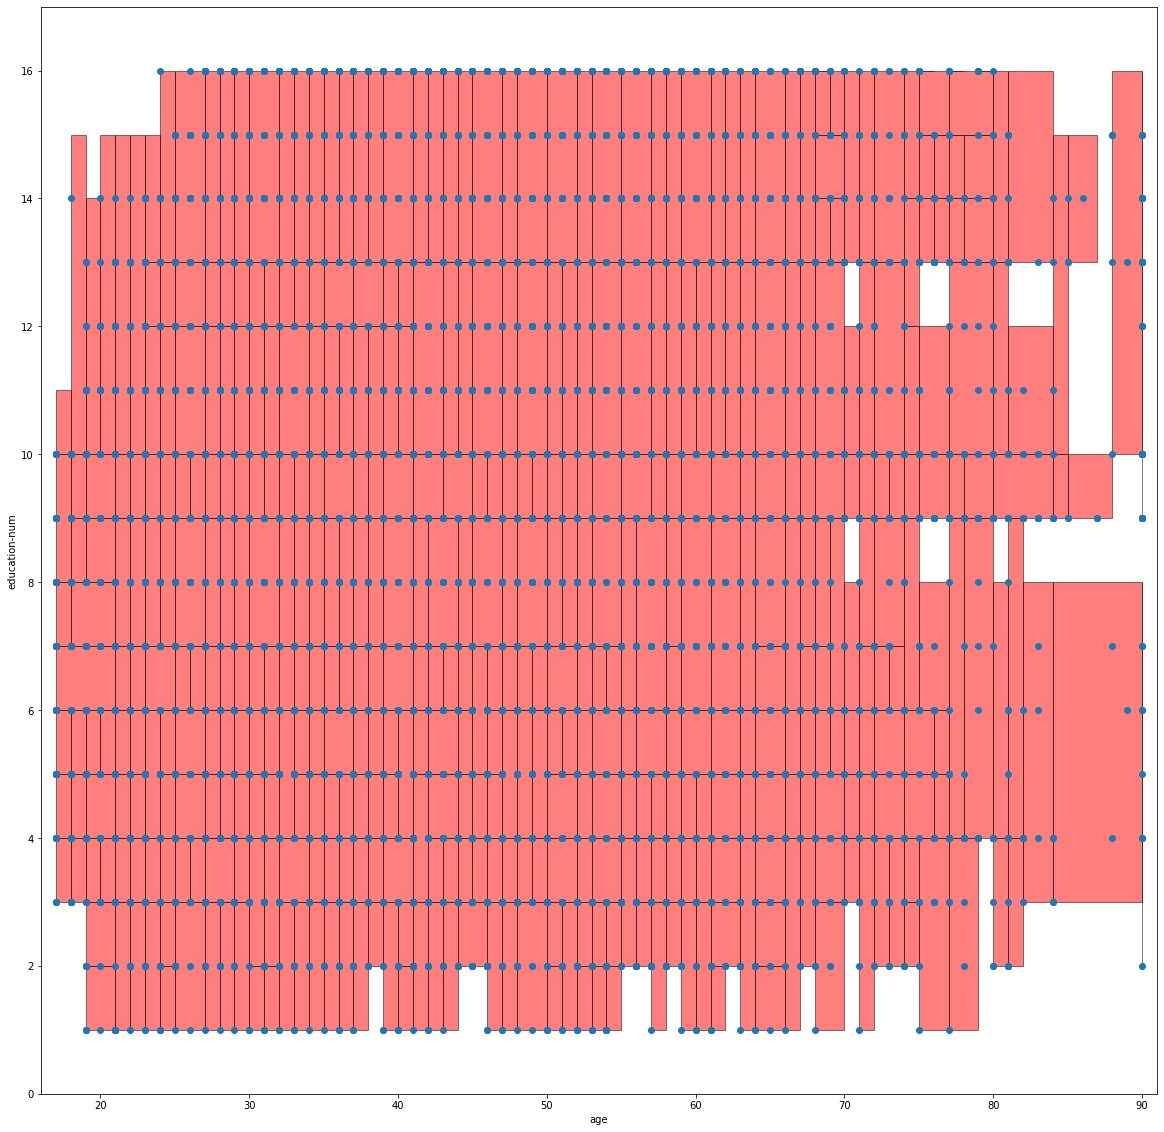

In [55]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, rects, column_x, column_y, facecolor='r')
pl.scatter(df[column_x], df[column_y])
pl.show()

# Generating an k-Anonymous Dataset

Of course, to use the data we want to produce a new dataset that contains one row for each partition and value of the sensitive attribute. To do this, we need to aggregate the columns in each partition.  Let's do this!

In [17]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

In [18]:
def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Finished {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = {}
        for name,val in grouped_columns.items():
            values[name] = val[0]
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            rows.append(values.copy())
    return pd.DataFrame(rows)

In [19]:
dfn = build_anonymized_dataset(df, finished_partitions, feature_columns, sensitive_column)

Finished 1 partitions...
Finished 101 partitions...
Finished 201 partitions...
Finished 301 partitions...
Finished 401 partitions...


In [20]:
# we sort the resulting dataframe using the feature columns and the sensitive attribute
dfn.sort_values(feature_columns+[sensitive_column])

,age,education-num,income,count
469,17.0,3.000000,<=50k,3
615,17.0,4.000000,<=50k,5
110,17.0,5.000000,<=50k,36
111,17.0,6.000000,<=50k,198
0,17.0,7.200599,<=50k,334
...,...,...,...,...
746,90.0,9.000000,>50k,4
750,90.0,10.545455,<=50k,9
751,90.0,10.545455,>50k,2
818,90.0,14.000000,<=50k,2


## Finishing questions

We have now implemented k-anonymity and checked that it works...

To finish we can check that you have learned the concepts and reflect over the issues we have seen in the exercises

**1. Is the dataset secure if you have achieved k-anonymity?**

**2. Think about your past three days, have you encountered any situation where bias implemented by engineering had an effect on you?**